In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("C:/Users/LENOVO/Desktop/Research_Paper/creditcard_data.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

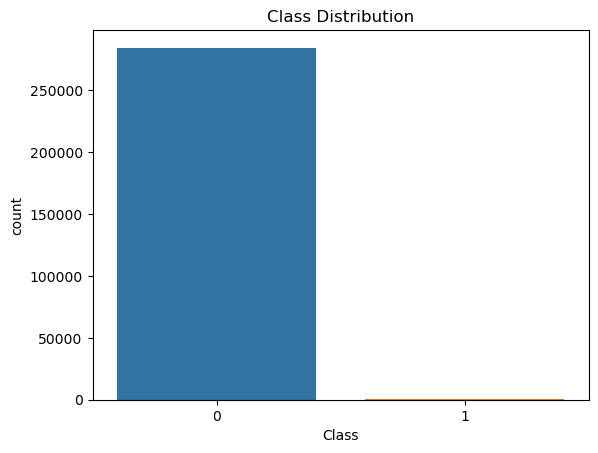

In [8]:
# Count plot for the 'Class' variable
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()


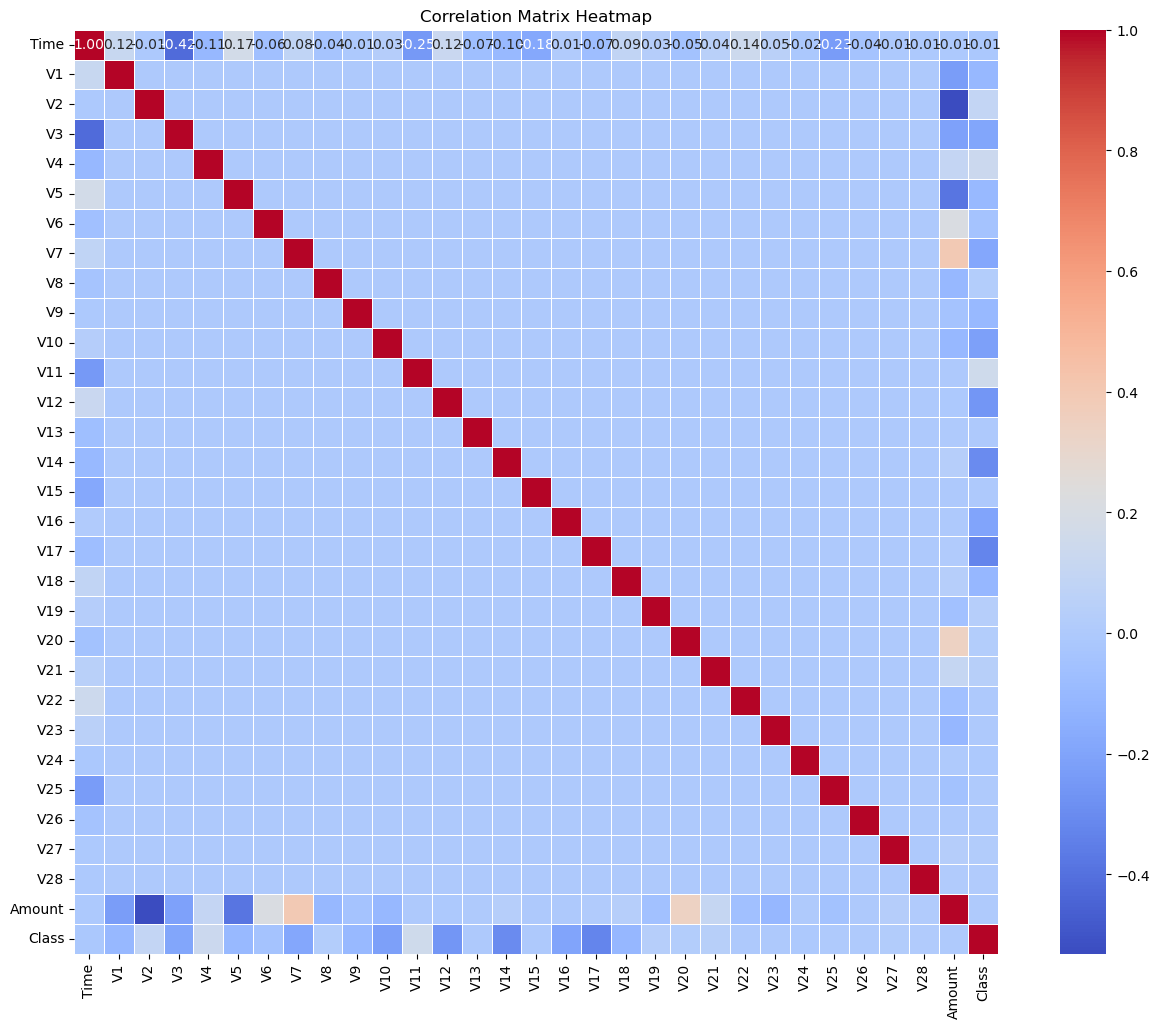

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [11]:
print(legit.shape)

(284315, 31)


In [12]:
print(fraud.shape)

(492, 31)


In [13]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**The data is unbalanced so the following things are done to make it balanced**

**We are building a sample dataset similar to distribution of normal transcations and fraudulent transaction**

In [16]:
legit_sample =legit.sample(n=492) 

In [17]:
df_new= pd.concat([legit_sample,fraud],axis=0)

In [18]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
4199,3750.0,1.389004,-0.539481,0.555612,-0.633111,-1.031900,-0.547648,-0.902613,0.019664,0.614851,...,-0.241935,-0.715007,0.121418,-0.146406,0.143689,-0.509126,-0.035471,-0.002225,8.37,0
270524,164121.0,-0.802964,1.514337,-1.632704,-0.820419,0.730268,-0.133280,0.100090,0.979918,-0.330370,...,-0.298967,-0.974562,0.094177,-0.415373,-0.239619,0.162513,0.079056,-0.021893,8.99,0
232532,147210.0,2.014463,-0.108884,-1.375291,0.190972,0.145337,-0.812071,0.146670,-0.247514,0.340164,...,0.305595,0.993806,-0.072725,-0.286643,0.272124,-0.104710,-0.021475,-0.066912,19.95,0
179262,123991.0,-0.185639,1.191887,-0.181929,0.619579,0.857069,-0.985402,1.365403,-0.332268,-0.253389,...,0.203497,0.610144,-0.217719,-0.046457,-0.359787,-0.569861,-0.063507,0.203941,1.00,0
43745,41637.0,-0.945865,0.578524,1.491300,-0.106632,0.386544,-0.250221,0.435650,0.187053,-0.562208,...,-0.159277,-0.336050,0.345169,-0.009017,-0.221736,0.085686,0.193808,0.065083,4.49,0


In [19]:
df_new['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


TypeError: Figure.savefig() missing 1 required positional argument: 'fname'

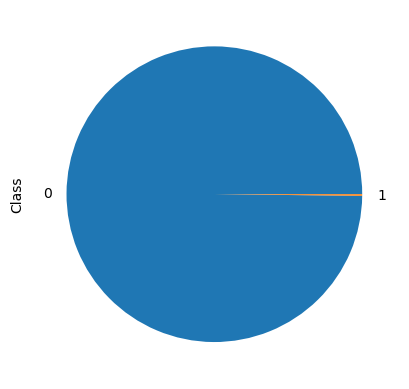

In [20]:
print((df.groupby('Class')['Class'].count ()/df['Class'].count())*100)
((df.groupby('Class')['Class'].count ()/df['Class'].count())*100).plot.pie()

plt.savefig()

In [ ]:
print((df_new.groupby('Class')['Class'].count ()/df['Class'].count())*100)
((df_new.groupby('Class')['Class'].count ()/df['Class'].count())*100).plot.pie()